In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ankulsharma150/netflix-data-analysis")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Paul\.cache\kagglehub\datasets\ankulsharma150\netflix-data-analysis\versions\1


In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
files = os.listdir(path)
print("Files in dataset:")
for file in files:
    print(file)

Files in dataset:
netflix_movies (1).csv


In [4]:
file_path = os.path.join(path, "netflix_movies (1).csv")

df = pd.read_csv(file_path)
print(df.shape)
print(df.head())

(8807, 12)
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2

In [5]:
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [6]:
# Checking for missing values
print(df.isnull().sum())
print(df.dtypes)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [7]:
# Exploring the data
print(df.describe())
print(df['type'].value_counts())

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [8]:
print(df['rating'].value_counts())

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [9]:
print(df['country'].value_counts().head(10))

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


In [10]:
print(df['listed_in'].value_counts().head(10))

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


In [11]:
print(df.groupby('type')['release_year'].describe())

          count         mean       std     min     25%     50%     75%     max
type                                                                          
Movie    6131.0  2013.121514  9.678169  1942.0  2012.0  2016.0  2018.0  2021.0
TV Show  2676.0  2016.605755  5.740138  1925.0  2016.0  2018.0  2020.0  2021.0


In [12]:
print(df['date_added'].value_counts().head(10))

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
October 1, 2019       60
July 1, 2021          60
November 1, 2018      60
September 1, 2021     56
July 1, 2019          52
Name: count, dtype: int64


In [14]:
# What are the longest and shortest titles
print("Longest titles")
print(df['title'].str.len().nlargest(5))
print("\nShortest titles")
print(df['title'].str.len().nsmallest(5))

Longest titles
5164    104
2813     93
3240     88
8462     88
4851     83
Name: title, dtype: int64

Shortest titles
2069    1
5958    1
7155    1
7687    1
2127    2
Name: title, dtype: int64


In [18]:
# See some short and long titles
df['title_length'] = df['title'].str.len()

print("Examples of long titles")
print(df.nlargest(5, 'title_length')[['title', 'title_length']])
print("\nExamples of short titles")
print(df.nsmallest(5, 'title_length')[['title', 'title_length']])

Examples of long titles
                                                  title  title_length
5164  Jim & Andy: The Great Beyond - Featuring a Ver...           104
2813  Ken Burns Presents: College Behind Bars: A Fil...            93
3240  Mike Birbiglia: What I Should Have Said Was No...            88
8462  The Power of Grayskull: The Definitive History...            88
4851  Steve Martin and Martin Short: An Evening You ...            83

Examples of short titles
     title  title_length
2069     H             1
5958     9             1
7155     K             1
7687     P             1
2127    3%             2


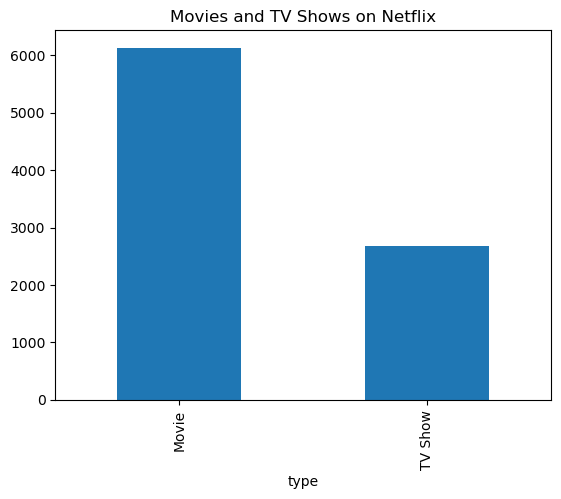

In [19]:
# Visualizing the data
import matplotlib.pyplot as plt

df['type'].value_counts().plot(kind='bar')
plt.title("Movies and TV Shows on Netflix")
plt.show()

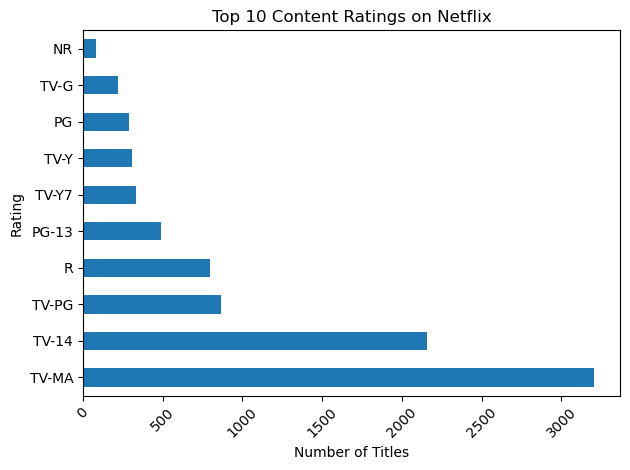

In [21]:
df['rating'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Content Ratings on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()